In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [39]:
df_test = pd.read_csv("test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(2)
memory usage: 31.6 MB


In [4]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,0


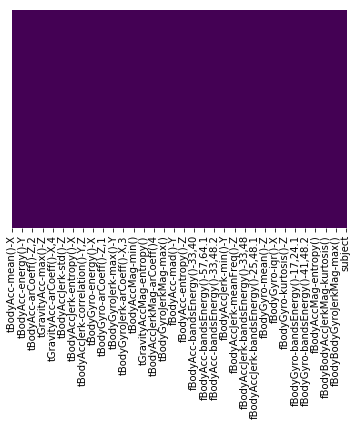

In [5]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)

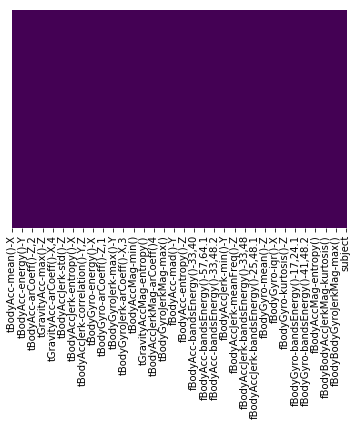

In [40]:
sns.heatmap(df_test.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop("Activity", axis=1))
scaled_features = scaler.transform(df.drop("Activity", axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scaler_test = StandardScaler()
scaler_test.fit(df_test.drop("Activity", axis=1))
scaled_features_test = scaler_test.transform(df_test.drop("Activity", axis=1))
df_feat_test = pd.DataFrame(scaled_features_test, columns=df_test.columns[:-1])

In [13]:
df_feat.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,-1.828851
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,-1.828851
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,-1.828851
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,-1.828851
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,-1.828851


In [42]:
df_feat_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,-0.277708,-0.210631,2.193076,-0.787267,-0.833212,-0.093444,-0.808091,-0.839013,-0.104178,-0.824746,...,-0.166391,-0.344765,0.003566,0.357573,-1.363900,0.575487,-0.404790,0.622723,-0.038348,-1.580825
1,0.198660,0.182591,-0.250264,-0.876984,-0.929061,-0.858050,-0.897145,-0.928949,-0.863269,-0.824746,...,0.491021,0.012257,-0.264092,0.030787,-0.747232,1.871192,-0.361739,0.636731,-0.145709,-1.580825
2,0.024587,-0.318055,-0.228485,-0.921598,-0.934054,-0.907107,-0.916891,-0.933813,-0.912639,-0.910982,...,0.274821,-0.134989,-0.119671,0.446072,0.037919,0.323938,-0.370932,0.632845,-0.126855,-1.580825
3,-0.061057,-0.573037,-0.213709,-0.923837,-0.940817,-0.919082,-0.919152,-0.941599,-0.927776,-0.909740,...,-0.210678,-0.441714,-0.066443,0.338512,0.472695,0.625874,-0.363434,0.645276,-0.117585,-1.580825
4,0.013823,-0.387881,-0.494639,-0.921679,-0.929036,-0.949979,-0.916133,-0.923846,-0.951396,-0.909740,...,-0.810527,-0.796939,-0.022276,-0.098529,1.097348,-0.201999,-0.350256,0.665657,-0.104118,-1.580825


In [14]:
X = df_feat
y = df['Activity']

In [43]:
X_test = df_feat_test
y_test = df_test['Activity']

In [15]:
# from sklearn.model_selection import train_test_split

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors = 21)

In [57]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [58]:
pred = knn.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
print(confusion_matrix(y_test, pred))

[[513  19   0   0   0   0]
 [102 385   3   0   0   1]
 [ 15  11 511   0   0   0]
 [  0   0   0 483  11   2]
 [  0   0   0  45 325  50]
 [  0   0   0  40   1 430]]


In [61]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88       532
          1       0.93      0.78      0.85       491
          2       0.99      0.95      0.97       537
          3       0.85      0.97      0.91       496
          4       0.96      0.77      0.86       420
          5       0.89      0.91      0.90       471

avg / total       0.91      0.90      0.90      2947



In [48]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

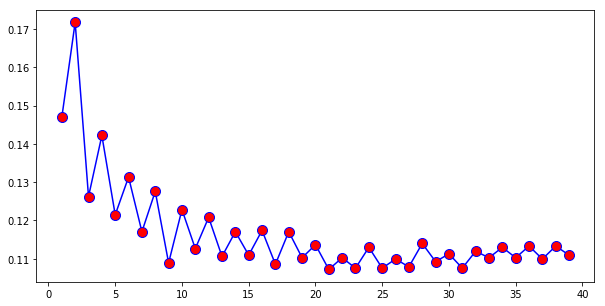

In [49]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40), error_rate, color='blue', marker='o', markerfacecolor='red', markersize=10)